In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"] = (10, 6)



In [2]:
# Load the data
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


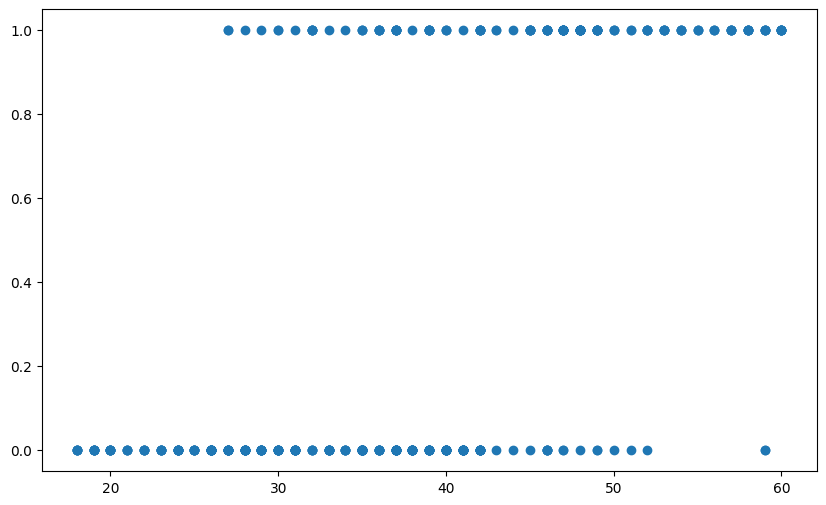

In [3]:
# Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.20)


In [4]:
# Creating the logistic regression model

# Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions
def predict(X, b0, b1):
    return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Method to train the model
def logistic_regression(X, Y):

    X = normalize(X)

    # Initializing variables
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

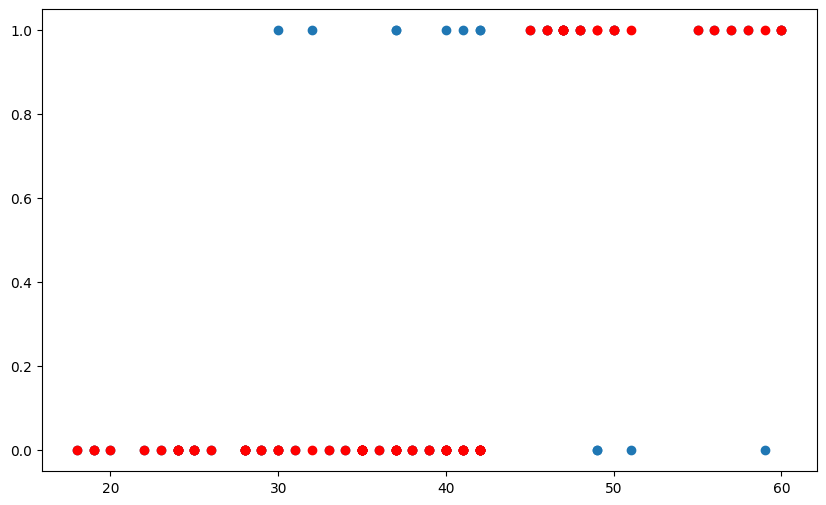

In [5]:
# Training the model
b0, b1 = logistic_regression(X_train, y_train)

# Making predictions
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()



In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[51,  4],
       [ 8, 17]], dtype=int64)

In [7]:
#another way to print TP,FN,FP,TN
tp, fn, fp, tn = confusion_matrix(y_test, y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 17 8 4 51


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Classification Report : ')
print (classification_report(y_test, y_pred))

Confusion Matrix :
[[51  4]
 [ 8 17]]
Accuracy Score : 0.85
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        55
           1       0.81      0.68      0.74        25

    accuracy                           0.85        80
   macro avg       0.84      0.80      0.82        80
weighted avg       0.85      0.85      0.85        80



In [9]:
#error rate
Accuracy=accuracy_score(y_test, y_pred)
print(Accuracy)
Error_rate=1-Accuracy
print(Error_rate)

0.85
0.15000000000000002
